### Initialization Methods : 

#### The reason we do random initialization instead of constant initialization for weights and bias  : 



- If we give all the weight as same ,in forward propogation all the neuron will give the same results, and entire network will behave as if one neuron.
- Furthermore all the gradients in backward propogation will be same and there wont be stochasticity in the network.
- We call this a symmetry, which we need to break if initially, and further network will achieve values of the parameters such that loss minimise. 


- That is the reason we give random initialization for all weights and bias. 


- Another reason is , if we provide constant initialization , we might end up killing all neurons in case of vanishing gradient issue or we end up having very high loss due to exploding gradient. 

    


## what happens if all the weights are intialized with same number:

$ $
#### Case 1: w = 0 and b = 0
- if we find the derivative of weights w.r.t Loss,
    - $z = w^T.x$ will be become 0
    - As z = 0, all derivative of ReLU will become 0
    - and the network won't update.

This is called as dead neuron concept.



#### Case 2: all w's = 0 but bias is non zero +ve num 

In that case, the derivatives will be 1.


- Each weight will be updated with same reduction (minus learning rate * 1 (derivative of ReLu))

- Hence, all weights will become same.
    - and n/w won't learn anything


#### Case 3: All w's are same non zero (say  1) 

In this case, all the weights of the layer will become equal and hence representing a single neuron.

Hence, the network won't learn anything even if we increase neuron in the layer.


#### Question: How to break this Symmetry? 

Ans: By initalizing weights randomly

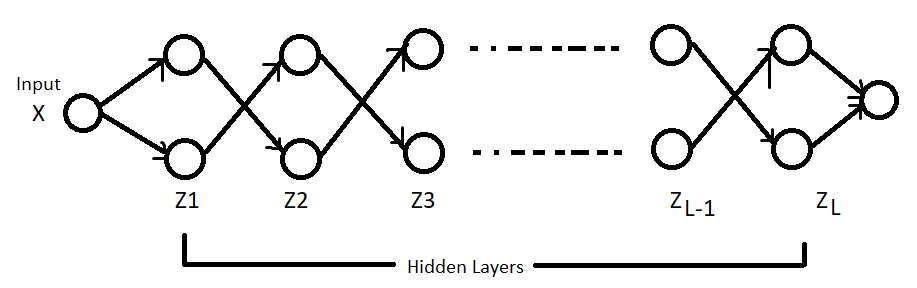

        assume all the biases are not there 
        and assume linear activation 
        
        Z1 = w1.X
        Z2 = w2.Z1
        Z3 = w2.Z2
        ...
        ...
        Z_L = wL.Z_L-1
        
        for Last Layer
        
            ZL = wL*wL-1 .... * w2*w1 * X
            
        the moment some gradients go over 1, 
        all the weights starts multiplying very fast. 
        that we call exploding gradient. 
        that weight >1 we call exploding weight.
        
        This issue can happen because of improper initialization as well as the activation Functional properties. 
        
        
       
        Similarly very small weight which can cause vanishing issue , resulting the dead neuron ,since small number multiplies again and again give a very small weight update and model will not learn anything.
        
        To Mitigate such issues,  
        Proper Initialization may help . 
        Another way to mitigate this issue is selection of activation function ! 
        
        

---   

        Random Initialization : 
---        

        Method 1 : take a normal distribution with 0 mean and some very small standard deviation. 
        
        Wij ~ N(μ,σ)
                μ = 0
                σ ~~ very small number 
                
              if we keep standard deviation very high, we face the issue of exploding gradient in backward propogation.
              
         
---

        Method 2: weight come from Uniform Distributions (-1,1)
        
        Wij ~ U(-1,1)
        
---


              
              
              

### Smart Initialization Techuniques : 

    tf.keras.layers.Dense(
        units,
        activation=None,
        use_bias=True,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None,
        **kwargs,
    )

In [8]:
dir(tf.keras.initializers)[:16]

<IPython.core.display.Javascript object>

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros']

In [1]:
tf.keras.initializers.HeNormal(
    seed=None
)

<IPython.core.display.Javascript object>

    Also available via the shortcut function tf.keras.initializers.he_normal.

    It draws samples from a 
    truncated normal distribution centered on 0 
    with 
        stddev = sqrt(2 / fan_in) 
    where fan_in is the number of input units in the weight tensor.

In [2]:
tf.keras.initializers.GlorotUniform()

<IPython.core.display.Javascript object>

    tf.keras.initializers.GlorotUniform(seed=None)
    
    Docstring:     
    The Glorot uniform initializer, also called Xavier uniform initializer.

    Also available via the shortcut function
    `tf.keras.initializers.glorot_uniform`.

    Draws samples from a uniform distribution within `[-limit, limit]`, where
    `limit = sqrt(6 / (fan_in + fan_out))` (`fan_in` is the number of input
    units in the weight tensor and `fan_out` is the number of output units).


### Fan in fan out

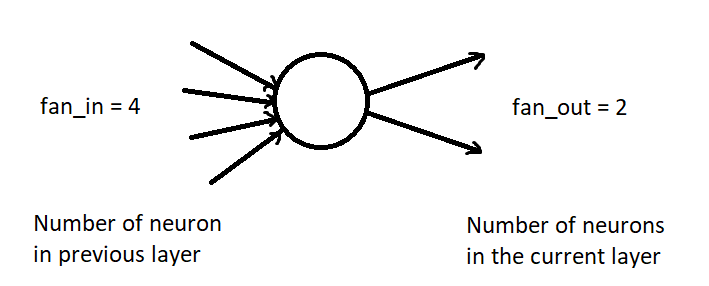

Imagine we have a neuron with 4 inputs and 2 outputs. 

Then 
- $fan-in \to 4$ and 
- $fan-out \to 2$.

##### Weight init strategies

- There are other strategies that have worked experimentaly but have weak theory supporting it.
- Some of these techniques are Xavier Glorot, He.


Weights could be initialized using uniform distribution as follows:
$$w^k_{ij} \sim Uniform\bigg[ \frac{-1}{\sqrt{fan_{in}}}, \frac{1}{\sqrt{fan_{out}}}\bigg]$$  
- These techniques were used around early $2010's$.

## Glorot init


Glorot initialization states that we could initialization weights using either of following approaches:
- Glorot Normal
- Glorot Uniform


Used with **tanh activation**


$ $
- Normal Distribution: 
     $$w^k_{ij} \sim N(0,\sigma_{ij}),\space where \space \sigma_{ij} = \sqrt\frac{2}{fan_{in}+fan_{out}}$$

- Uniform Distribution: 
     $$w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fan_{in}+fan_{out}}}, \frac{\sqrt{6}}{\sqrt{fan_{in}+fan_{out}}}\bigg]$$
     
     
## He init     
     
$ $
- Normal Distribution: 
     $$w^k_{ij} \sim N(0,\sigma_{ij}),\space where \space \sigma_{ij} = \sqrt\frac{2}{fan_{in}+fan_{out}}$$

- Uniform Distribution: 
     $$w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fan_{in}+fan_{out}}}, \frac{\sqrt{6}}{\sqrt{fan_{in}+fan_{out}}}\bigg]$$

### Summary : 


1. **Glorot init**
 - Glorot Normal : $w^k_{ij} \sim N(0,\sigma_{ij})$, where $\sigma_{ij} = \sqrt\frac{2}{fanin+fanout}$

<br>

 -  Glorot Uniform: $w^k_{ij} \sim Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin+fanout}}, \frac{\sqrt{6}}{\sqrt{fanin+fanout}}\bigg]$

<br>

2. **He init**
 - Normal Distribution: $N(0,\sigma)$, where $\sigma = \sqrt\frac{2}{fanin}$ 
 
 <br>
 
 - Uniform Distribution: $Uniform\bigg[ \frac{-\sqrt{6}}{\sqrt{fanin}}, \frac{\sqrt{6}}{\sqrt{fanin}}\bigg]$


Lets Implement Glorot Uniform weight intilization method

# Optimizers

In [14]:
dir(tf.keras.optimizers)

<IPython.core.display.Javascript object>

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'Ftrl',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'deserialize',
 'experimental',
 'get',
 'legacy',
 'schedules',
 'serialize']

    tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        amsgrad=False,
        weight_decay=None,
        clipnorm=None,
        clipvalue=None,
        global_clipnorm=None,
        use_ema=False,
        ema_momentum=0.99,
        ema_overwrite_frequency=None,
        jit_compile=True,
        name='Adam',

    tf.keras.models.Sequential.compile(
        self,
        optimizer='rmsprop',
        loss=None,
        metrics=None,
        loss_weights=None,
        weighted_metrics=None,
        run_eagerly=None,
        steps_per_execution=None,
        jit_compile=None,
        **kwargs,
    )

    tf.keras.models.Sequential.fit(
        self,
        x=None,
        y=None,
        batch_size=None,
        epochs=1,
        verbose='auto',
        callbacks=None,
        validation_split=0.0,
        validation_data=None,
        shuffle=True,
        class_weight=None,
        sample_weight=None,
        initial_epoch=0,
        steps_per_epoch=None,
        validation_steps=None,
        validation_batch_size=None,
        validation_freq=1,
        max_queue_size=10,
        workers=1,
        use_multiprocessing=False,
    )

In [ ]:
# kind of Gradient Descents : 

 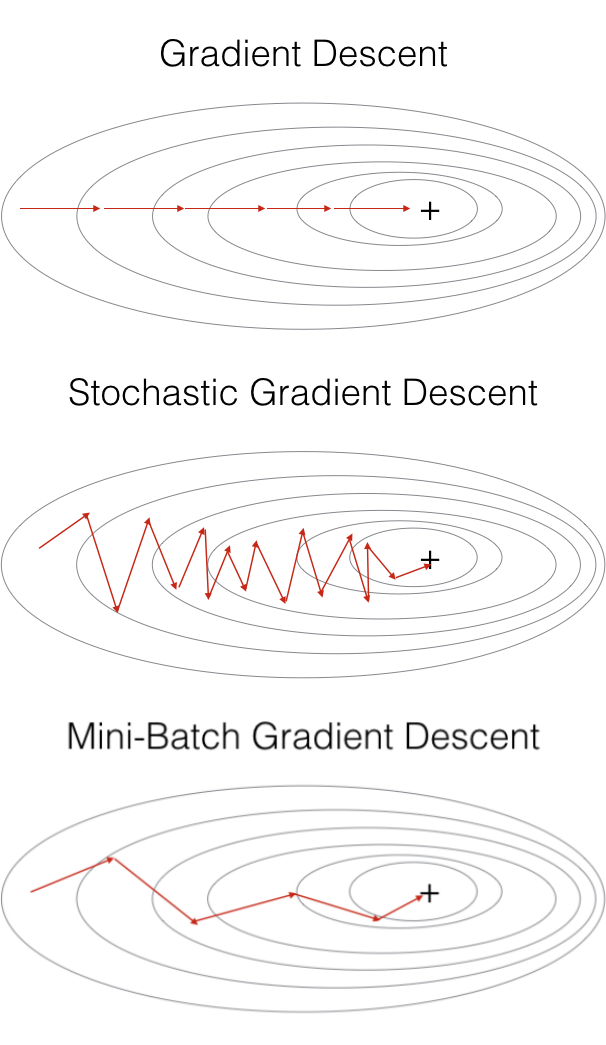

            # batch_size controls the above optimization 

## Variations of MiniBatch Gradient Descent : 

### Simple Exponential Smoothing of Gradient : 

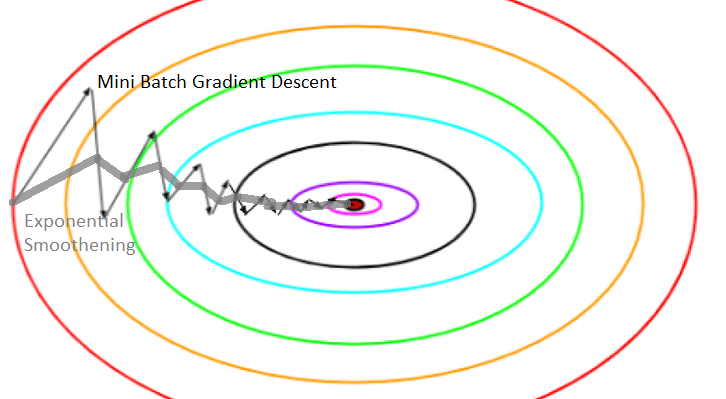

In [ ]:
# recent updates gets more importance then previous gradients ! 
# resulting smoothens the path and converge in the right direction faster.
# just like exponential moving average. 

    # lets say current gradient descent : 
    
            w = w - eta * dJ_dw
                         we add a exponential smoothening
                         term called beta.

### Exponential Moving Average

#### Why Mini-Batch GD takes so many epochs ?
Ans: Mini-batch GD takes some steps ($V$) before reaching global minima

In many of these steps, the optimizer
- Tends to move in direction where it will never reach minima
- Hence due to all these noisy steps, the GD takes so many epochs
              
#### Why does mini-Batch GD have noisy steps ?
Ans: Because, training data is divided into batches
- And for some batch the model has very small loss
- while for a few batch, the loss is quite high 
- Making the gradients of weights have high, low values
- Thus effecting the step of Mini-Batch GD optimizer

#### How to reduce the number of epochs during training of the model ?

Ans: By decreasing the number of steps ($V$) optimization algorithm takes to reach global minima.

<br>

#### How to reduce the steps $V$ required for the algorithm to reach global minima ?

If we combine these past steps taken by the optimizer:
-  for it to update the direction of step
- such that it moves towards global minima  



          

#### Will combining the past steps taken by the optimizer help ?
Ans: Yes, to better understand this lets assume model trained for 3 iterations

Note: 1 iteration = ForwardProp + BackProp

#### What will be the value of $V_1$ ?
Ans: $V_1 = \beta V_0 + (1-\beta) Δ w_1$



#### What will be the value of $V_2$ ?
Ans: $V_2 = \beta V_1 + (1-\beta) Δ w_2$

- $V_2 =\beta^2 V_0 + \beta(1-\beta)Δ w_1+ (1-\beta) Δ w_2 $


#### What will be value of $V_3$ ?

Ans: $V_3 = \beta V_2 + (1-\beta) Δ w_3$

- $V_3 =\beta^3 V_0 + \beta^2(1-\beta)Δ w_1+ \beta(1-\beta) Δ w_2 + (1-\beta) Δ w_3  $



Thus using **Exponential Moving Average**, the optimizer 
- updates its direction according to its previous step taken.
- And smoothes out its current direction 
- in order to reach global minima faster

http://ethen8181.github.io/machine-learning/time_series/1_exponential_smoothing.html

In [15]:
def exponential_smoothing(series, alpha):
    """given a series and alpha, return series of expoentially smoothed points"""
    results = np.zeros_like(series)

    # first value remains the same as series,
    # as there is no history to learn from
    results[0] = series[0] 
    for t in range(1, series.shape[0]):
        results[t] = alpha * series[t] + (1 - alpha) * results[t - 1]

    return results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

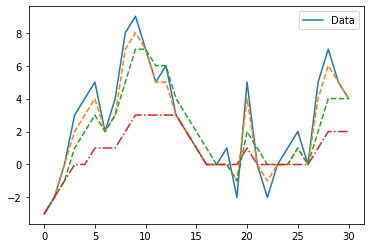

In [36]:
X = np.array([-3,-2,0,3,4,5,2,4,8,9,7,5,6,3,2,1,0,0,1,-2,5,0,-2,0,1,2,0,5,7,5,4])
plt.plot(X, label="Data")
plt.plot(exponential_smoothing(X,0.9),linestyle="dashed")
plt.plot(exponential_smoothing(X,0.5),linestyle="dashed")
plt.plot(exponential_smoothing(X,0.2),linestyle="dashdot")
plt.legend()


-------

### Gradient Descent with Momentum

#### How does Gradient Descent implement Exponential Moving Average ?

Ans: for some iteration t and layer $k$ of the NN :
- after finding $dw^k$ and $db^k$,

the exopnential moving average is introduced:
- $V_{dw^k} = β \times V_{dw^k} + (1-β) \times dw^k $

        velocity         acceleration 

Similarly:

- $V_{db^k} = β \times V_{db^k} + (1-β) \times db^k $

Hence Weight updation with learning rate $α$ becomes:
- $w^k = w^k -\alpha \times V_{dw^k}$

- $b^k = b^k -\alpha \times V_{db^k}$

<br>

**Note:** This approach can be analogous to a ball moving down a hill where:

- the gradients $dw^k $ and $db^k$ acts as acceleration
- the $V_{dw}$ and $V_{db}$ acts as velocity with which the ball is moving
- And the term $β$ acts as friction and helps prevent the ball from speeding up without limit

Hence we can say, as the ball rolls down, it gains **momentum**
- therefore this approach is called **Gradient Descent with Momentum**












---



    tf.keras.optimizers.SGD(
                            learning_rate=0.01,
                            momentum=0.0,
                            nesterov=False,
                            amsgrad=False,
                            weight_decay=None,
                            clipnorm=None,
                            clipvalue=None,
                            global_clipnorm=None,
                            use_ema=False,
                            ema_momentum=0.99,
                            ema_overwrite_frequency=None,
                            jit_compile=True,
                            name="SGD",
                            **kwargs
                            )
                            
    Gradient descent (with momentum) optimizer.

    Update rule for parameter w with gradient g when momentum is 0:                        w = w - learning_rate * g
    
    Update rule when momentum is larger than 0:
                            
       velocity = momentum * velocity - learning_rate * g
       w = w + velocity                     
       
    When nesterov=True, this rule becomes:
    
        velocity = momentum * velocity - learning_rate * g
        w = w + momentum * velocity - learning_rate * g

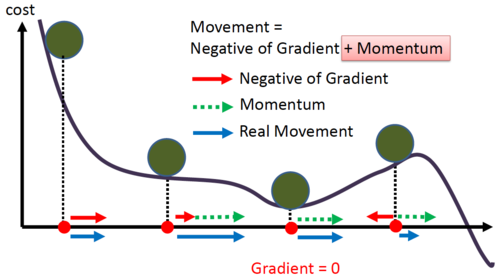

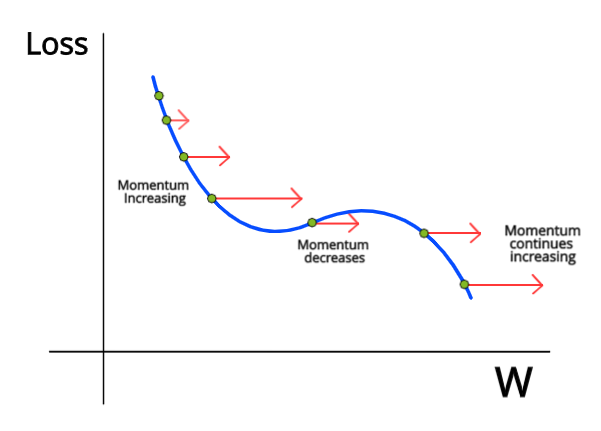

# **Business Case**

## **Content**

- 24Seven Business Case

- Random weight init

- Exploding Gradients

- Weight Intialization 

- Exponentially Moving Avg

- GD with momentum



You are working at **24Seven**, which has different stores buying various products. Based on the purchase history : 
- you want to divide the stores into classes for better inventory management and customer handling.



Lets now load the data



In [38]:
# !gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
# #https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

In [40]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--| 
|01| **Region** | Region of the store (1: Less purchase 2: frequent purchase 3: high purchase|
|02| **Fresh** | How many fresh items are brought | 
|03|**Milk**| How many units of Milk is purchased |
|04|**Grocery**|Units of Grocery bought for the store |
|05|**Frozen**|Frozen items purchased |
|06|**Detergents_Paper**|Unit of Detergents and paper bought |
|07|**Delicassen**|Food related items |
|08|**class**| Type/Category of the Store (1 ,2 , 3)|


In [58]:
df = pd.read_csv('multiclass.csv')

df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [59]:
df.shape

(440, 8)

In [60]:
df = pd.get_dummies(df, columns = ['Region'])

#storing class label
Y = df['class']
df = pd.get_dummies(df, columns = ['class'])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,0
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,0
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,0
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,1,1,0,0


In [61]:
X = df.drop(columns=['class_1','class_2','class_3'])
y = df[['class_1','class_2','class_3']]

[0.45961362 0.40517227]


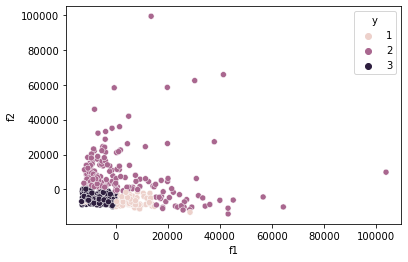

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

# reducing features to just 2 features
pca = PCA(n_components=2)
visual_1 = pca.fit_transform(X)
visual_1.shape

df2 = pd.DataFrame(visual_1, columns=['f1', 'f2'])
df2['y'] = Y
print(pca.explained_variance_ratio_)
sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

In [63]:
# X

#### Train-test-split

In [65]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


#### Scaling data

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [67]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#### creating a baseline model 

In [68]:
def create_baseline():

    model = Sequential([
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'),
                    Dense(128, activation="relu",kernel_initializer='glorot_uniform'), 
                    Dense(64, activation="relu",kernel_initializer='glorot_uniform'), 
                    Dense(32, activation="relu",kernel_initializer='glorot_uniform'), 
                    Dense(3,activation='softmax')])  
    return model

In [69]:
model = create_baseline()

####  MiniBatch Gradient Descnet as Optimizer 
#### with momentum = 0

In [70]:

# MiniBatch Gradient Descnet as Optimizer 

model.compile(
    optimizer = tf.keras.optimizers.SGD(
                                        learning_rate=0.01,
                                        momentum=0.0,          
                                         # by default momentum = 0.0
                                        name='SGD'
                                        ),
    loss = tf.keras.losses.CategoricalCrossentropy()
)


In [71]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=10, batch_size=128,
                   verbose = 0)


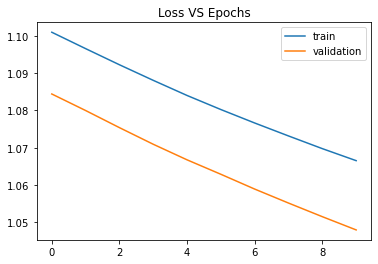

In [72]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


In [73]:
# continue with more iterations 

In [74]:
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_val, y_val), 
                    epochs=200, 
                    batch_size=128, 
                    verbose = 0)


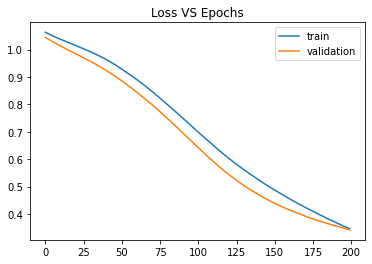

In [75]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


In [80]:
pd.DataFrame(history.history).loc[199]

loss        0.346495
val_loss    0.341847
Name: 199, dtype: float64

#### Now lets compare above model with momentum based model : 

In [83]:
model_gdm = create_baseline()

In [84]:
model_gdm.compile(
        optimizer = tf.keras.optimizers.SGD(momentum=0.9),
        loss = tf.keras.losses.CategoricalCrossentropy() 
)


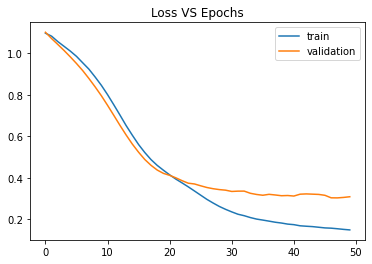

In [85]:
history = model_gdm.fit(X_train,
                        y_train,
                        validation_data = (X_val, y_val), 
                        epochs=50,
                        batch_size=128, 
                        verbose = 0)
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()
  


#### as we can observe  , what happened previously with 200 epochs , 
#### with momentum it converged in just 20 epochs 

In [88]:
pd.DataFrame(history.history).iloc[20]

loss        0.414511
val_loss    0.412128
Name: 20, dtype: float64